In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import NearestNeighbors
from itertools import product

In [196]:
path = "./files/Country-data.csv"
df = pd.read_csv(path)
df_copy = df.copy()
df_copy = df_copy.drop(['country'], axis=1)

In [197]:
df.sample(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
64,Guinea-Bissau,114.0,14.9,8.50,35.2,1390,2.97,55.6,5.05,547
52,Fiji,24.1,57.8,4.86,63.9,7350,4.23,65.3,2.67,3650
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220
29,Canada,5.6,29.1,11.30,31.0,40700,2.87,81.3,1.63,47400


In [198]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [199]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [200]:
df[df.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


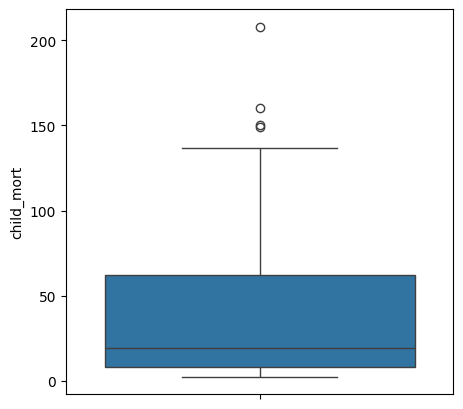

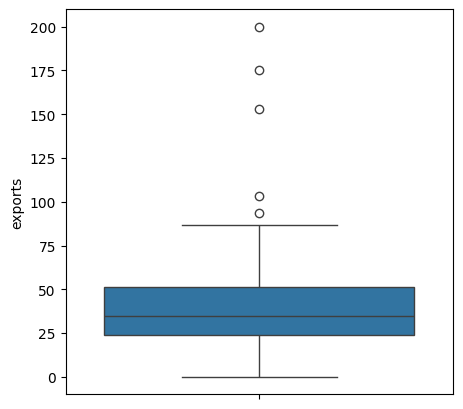

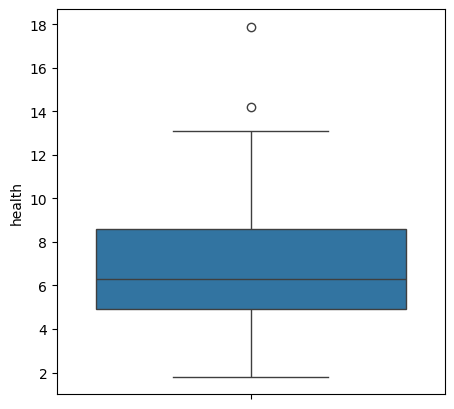

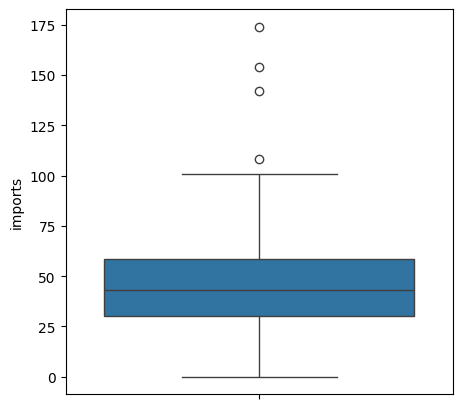

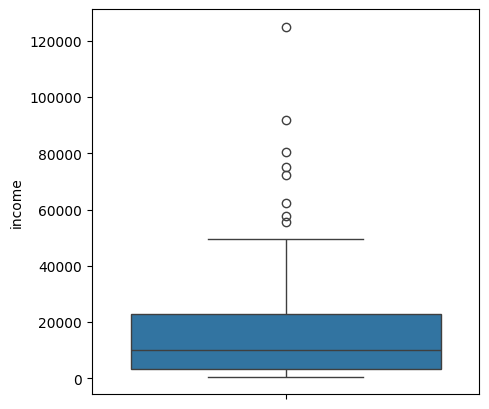

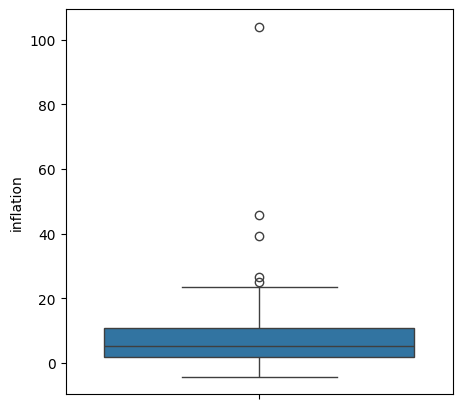

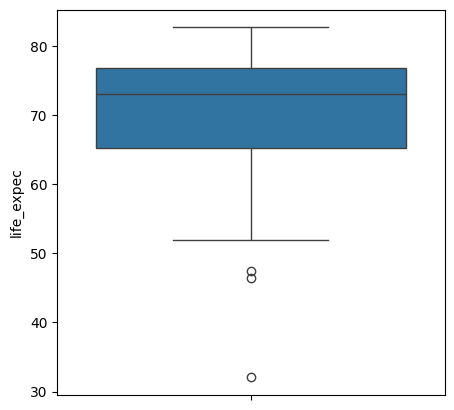

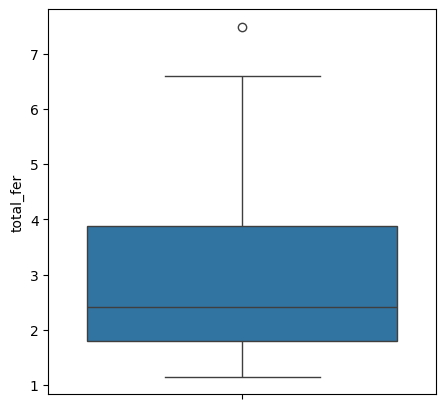

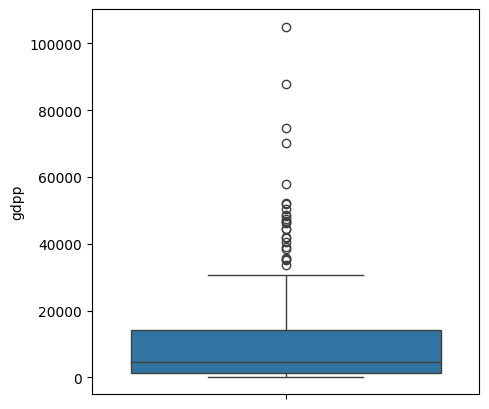

In [201]:
int_cols = df.select_dtypes(exclude="object").columns
for i in int_cols:
    plt.figure(figsize=(5, 5))
    sns.boxplot(data=df, y=i)
    plt.show()

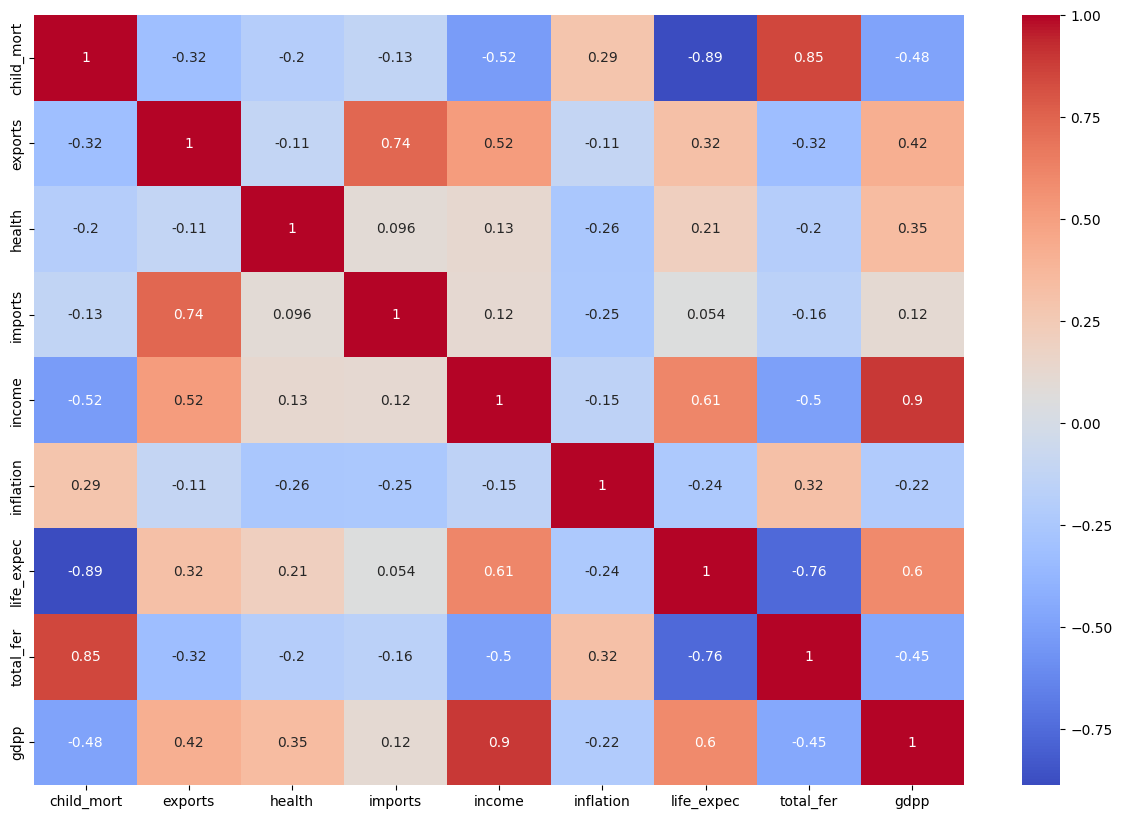

In [202]:
fig = plt.figure(figsize=(15, 10))
sns.heatmap(df_copy.corr(), annot=True, cmap='coolwarm')
plt.show()

In [203]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(['country'], axis=1))
df_scaled = pd.DataFrame(df_scaled, columns=df.drop(['country'], axis=1).columns)

In [204]:
df_scaled.sample(5)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
98,-0.782681,4.094101,0.669799,4.437577,0.580393,-0.374972,1.099002,-1.052114,0.445220
47,-0.228066,-0.724812,-0.787150,-0.840627,-0.379011,0.219961,-0.006281,0.160362,-0.567161
109,0.217119,-1.153648,-0.571711,-0.434611,-0.788475,0.694389,-0.254406,-0.223920,-0.677045
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180


In [205]:
pca = PCA()
pca.fit(df_scaled)
pca_data_scaled = pca.transform(df_scaled)

In [206]:
var = pca.explained_variance_ratio_
var

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

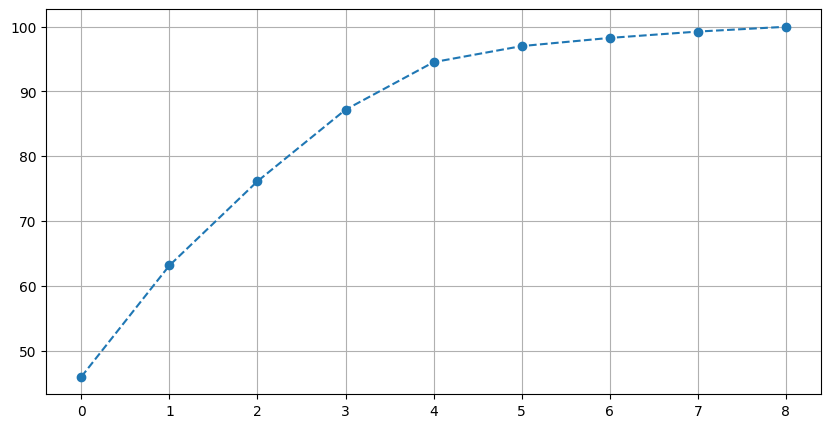

In [207]:
sum_var = np.cumsum(np.round(var, decimals=4) * 100)
plt.figure(figsize=(10, 5))
plt.plot(sum_var, marker='o', linestyle='--')
plt.grid()
plt.show()

In [208]:
pca_data_scaled = pd.DataFrame(pca_data_scaled)
pca_data_scaled.drop([4,5,6,7,8], axis=1, inplace=True)

## K-means

Con PCA

In [209]:
sum_of_squared_distances = []
silhouette_scores = []
K = range(2, 15)
for i in K:
    kmeans = KMeans(n_clusters=i)
    y = kmeans.fit_predict(pca_data_scaled)
    sum_of_squared_distances.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pca_data_scaled, y))

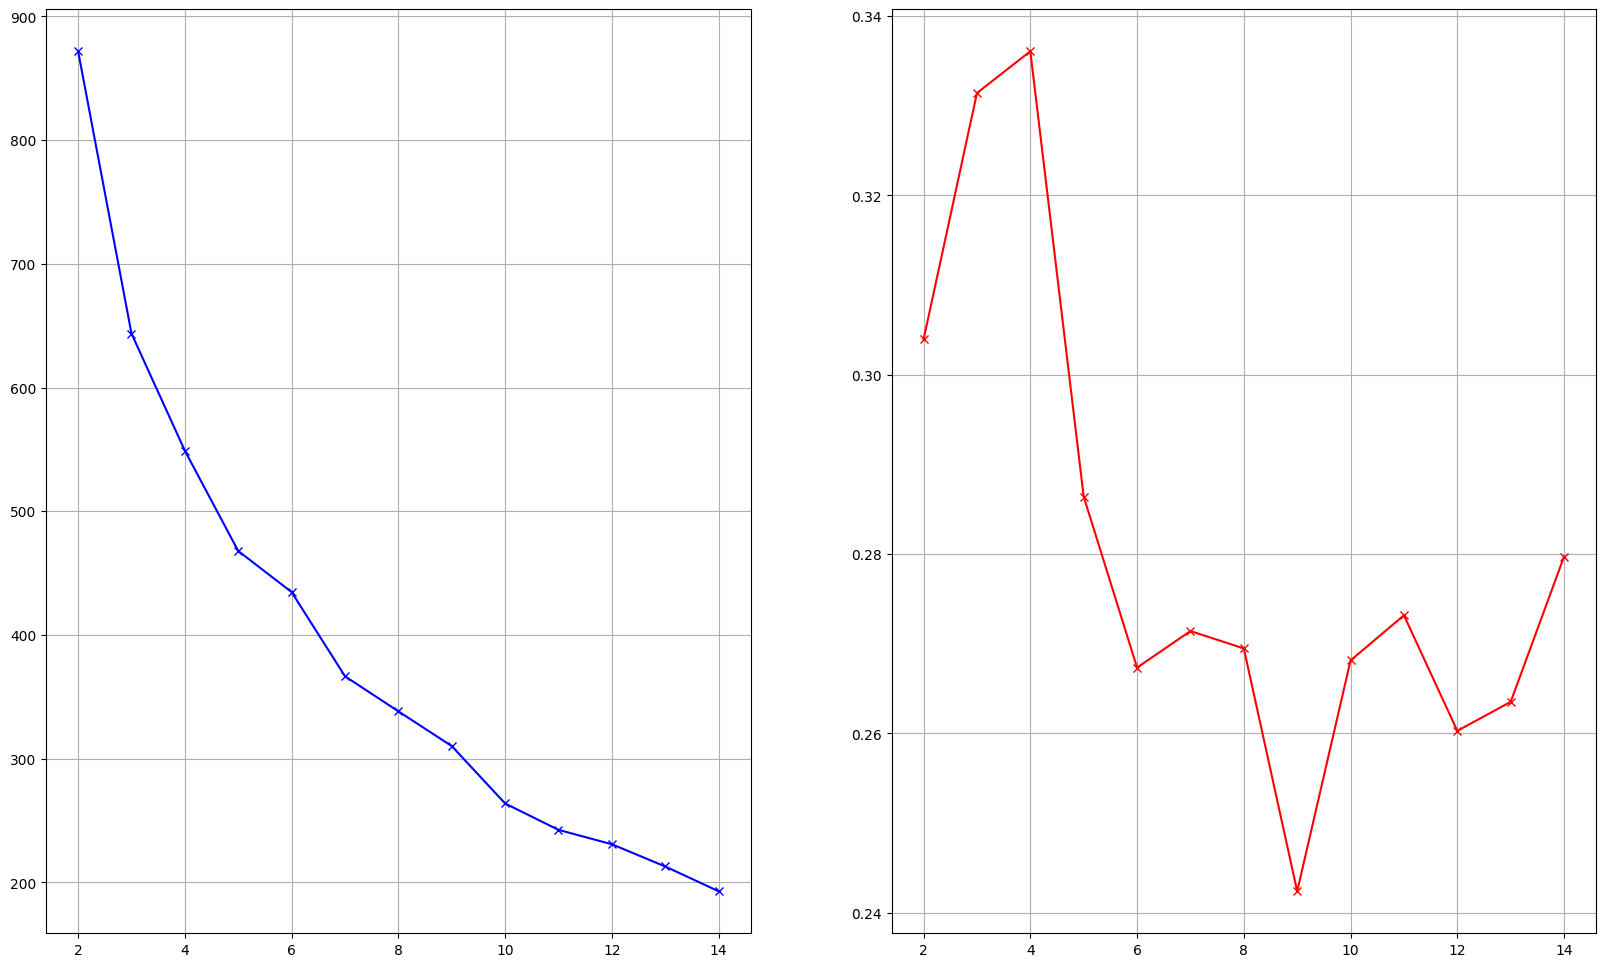

In [210]:
fig, ax = plt.subplots(1,2, figsize=(20,12))
ax[0].plot(K, sum_of_squared_distances, 'bx-')
ax[0].grid()
ax[1].plot(K, silhouette_scores, 'rx-')
ax[1].grid()
plt.show()

In [211]:
kmeans = KMeans(n_clusters=4)
y = kmeans.fit_predict(pca_data_scaled)
print(silhouette_score(pca_data_scaled, y))
df["k_means_pca"] = y

0.33418637859572103


Sin PCA

In [212]:
sum_of_squared_distances = []
silhouette_scores = []
K = range(2, 15)
for i in K:
    kmeans = KMeans(n_clusters=i)
    y = kmeans.fit_predict(df_scaled)
    sum_of_squared_distances.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, y))

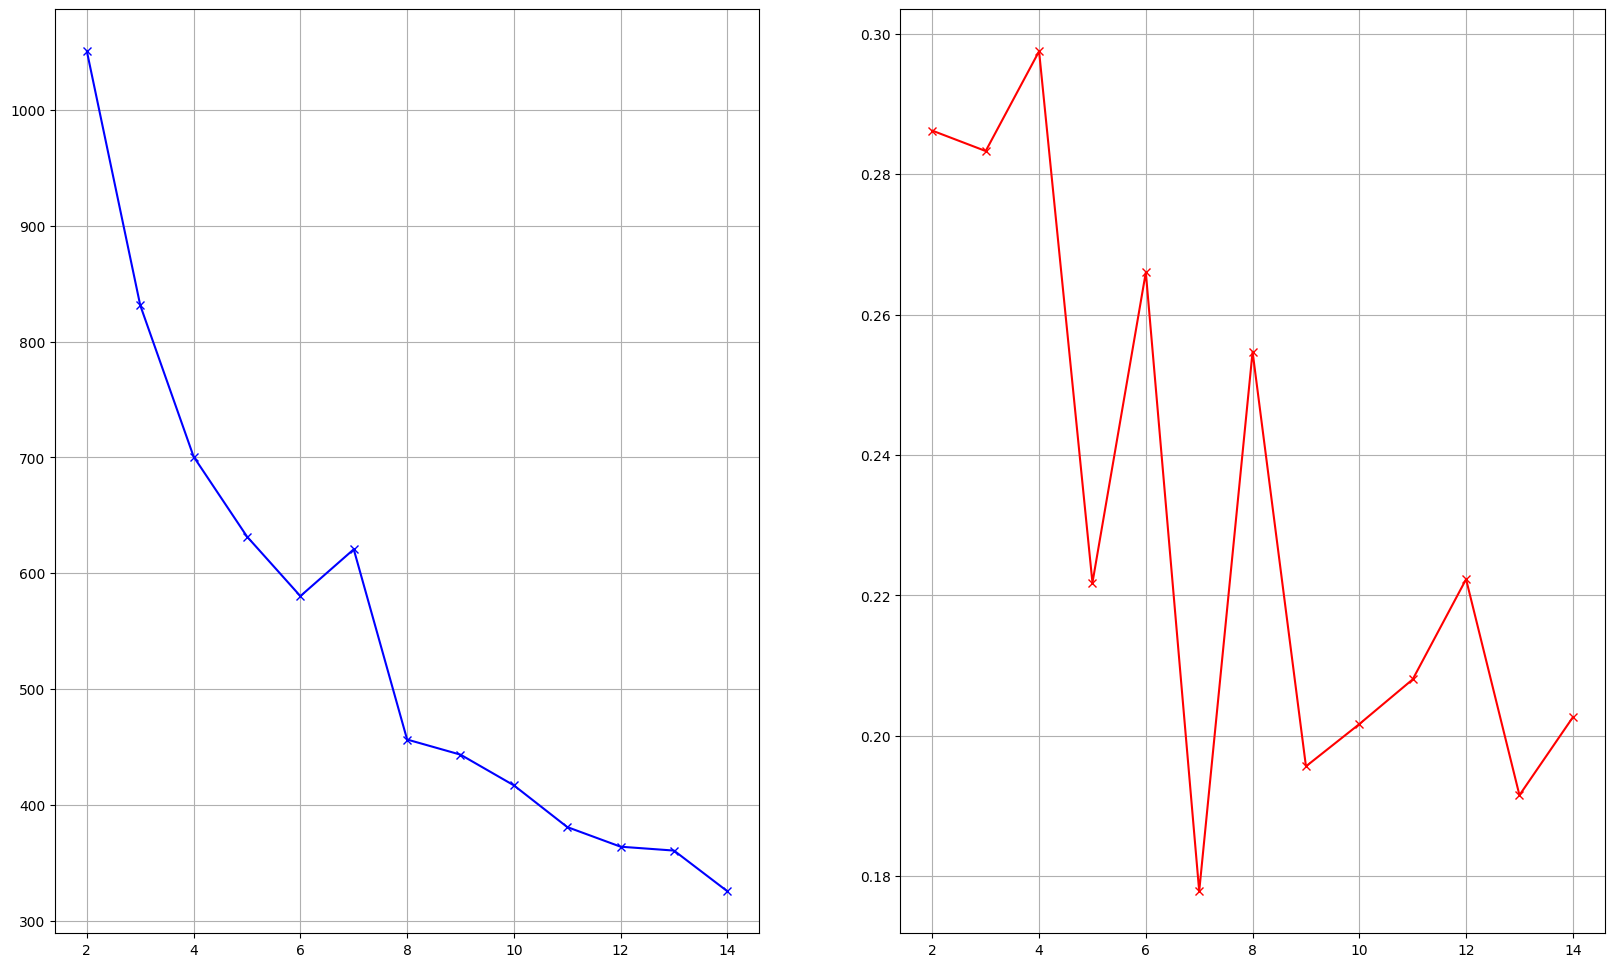

In [213]:
fig, ax = plt.subplots(1,2, figsize=(20,12))
ax[0].plot(K, sum_of_squared_distances, 'bx-')
ax[0].grid()
ax[1].plot(K, silhouette_scores, 'rx-')
ax[1].grid()
plt.show()

In [214]:
kmeans = KMeans(n_clusters=4)
y = kmeans.fit_predict(pca_data_scaled)
print(silhouette_score(pca_data_scaled, y))
df["k_means_pca"] = y

0.35491314499063326


## Hierarchical Clustering

Con PCA

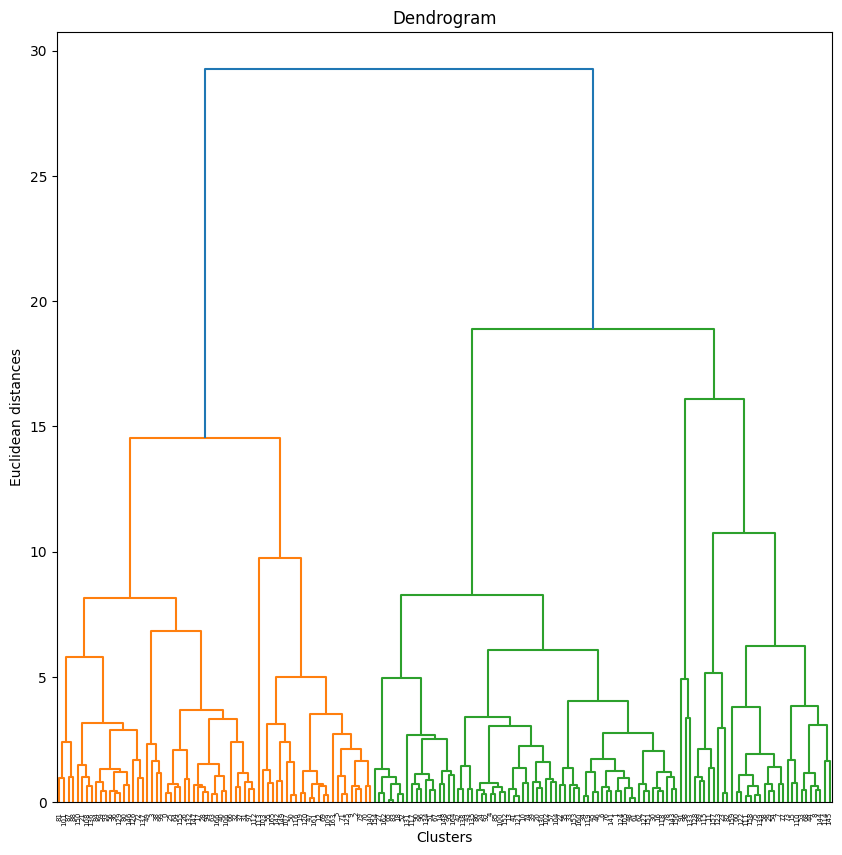

In [215]:
fig = plt.figure(figsize=(10, 10))
dendrogram_plot = dendrogram(linkage(pca_data_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distances')
plt.show()

In [216]:
hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(pca_data_scaled)
print(silhouette_score(pca_data_scaled, y_hc))
df["hc_pca"] = y_hc

0.30701107040805253


Sin PCA

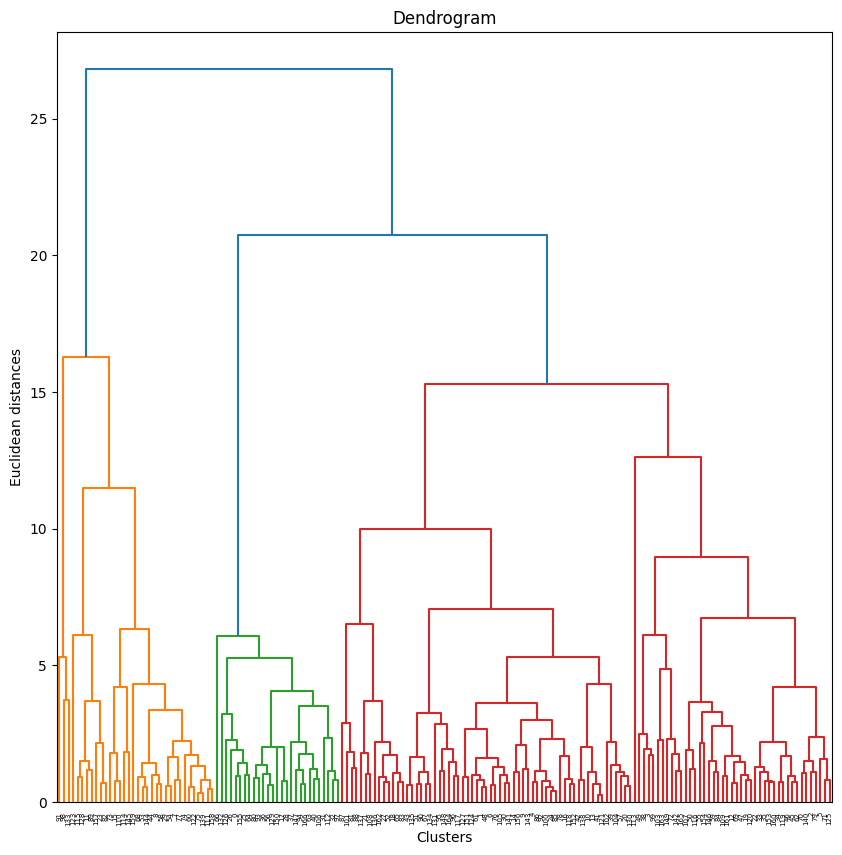

In [217]:
fig = plt.figure(figsize=(10, 10))
dendrogram_plot = dendrogram(linkage(df_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distances')
plt.show()

In [218]:
hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(df_scaled)
print(silhouette_score(df_scaled, y_hc))
df["hc"] = y_hc

0.3153134331018189


## DBSCAN

Con PCA

In [219]:
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(pca_data_scaled)
distances, indices = neighbors_fit.kneighbors(pca_data_scaled)

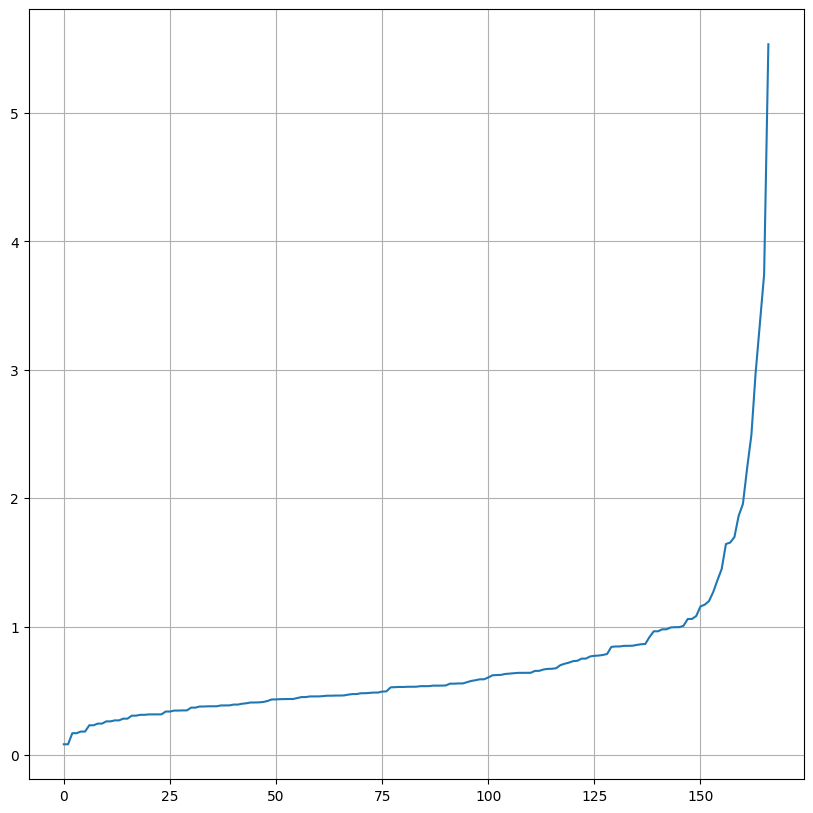

In [220]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
fig = plt.figure(figsize=(10, 10))
plt.plot(distances)
plt.grid()
plt.show()

In [221]:
eps_values = np.arange(0.5, 2.0, 0.1)
min_samples = np.arange(3, 12)
eps_values, min_samples

(array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
        1.8, 1.9]),
 array([ 3,  4,  5,  6,  7,  8,  9, 10, 11]))

In [222]:
dbscan_prams = list(product(eps_values, min_samples))

no_of_clusters = []
sil_scores = []
for i in dbscan_prams:
    y_dbscan = DBSCAN(eps=i[0], min_samples=i[1]).fit_predict(pca_data_scaled)
    try:
        sil_scores.append(silhouette_score(pca_data_scaled, y_dbscan))
        
    except:
        sil_scores.append(0)
    no_of_clusters.append(len(np.unique(y_dbscan)))

In [223]:
df_param_tunning = pd.DataFrame.from_records(dbscan_prams, columns=['Eps', 'Min_samples'])
df_param_tunning['sil_scores'] = sil_scores
df_param_tunning['no_of_clusters'] = no_of_clusters

In [224]:
pivot_1 = pd.pivot_table(df_param_tunning, values='sil_scores', columns='Eps', index='Min_samples')
pivot_2 = pd.pivot_table(df_param_tunning, values='no_of_clusters', columns='Eps', index='Min_samples')

<Axes: xlabel='Eps', ylabel='Min_samples'>

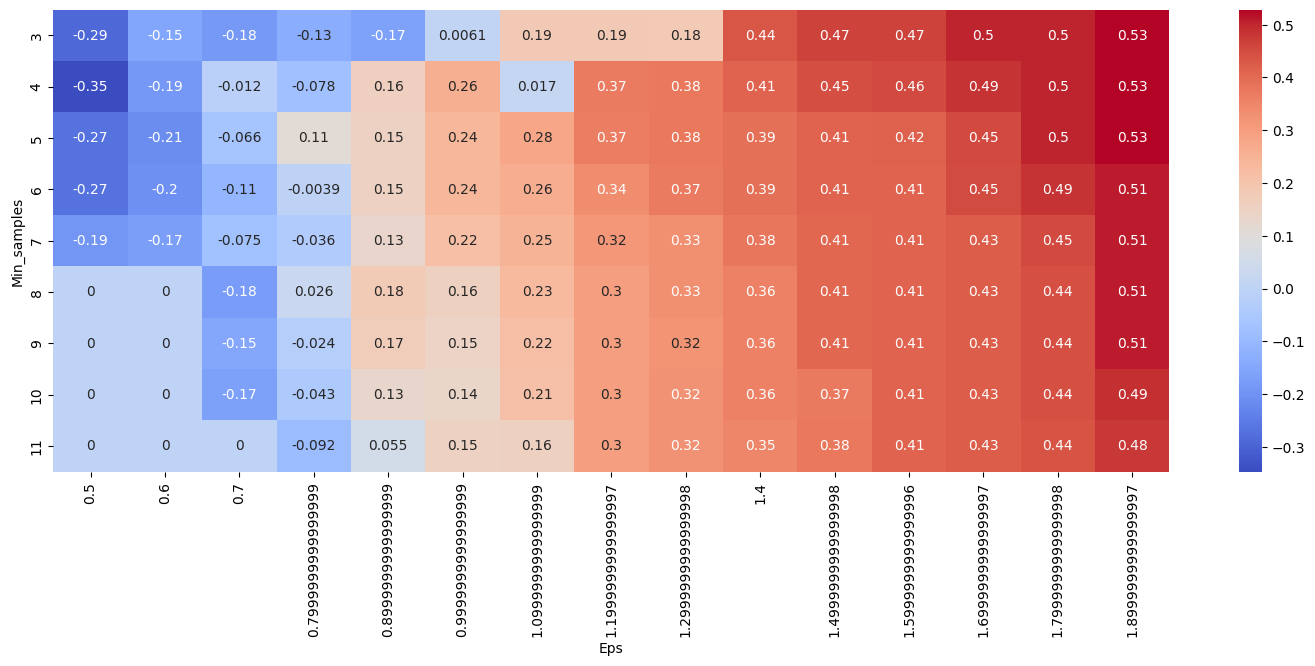

In [225]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size":10}, cmap='coolwarm', ax=ax)

<Axes: xlabel='Eps', ylabel='Min_samples'>

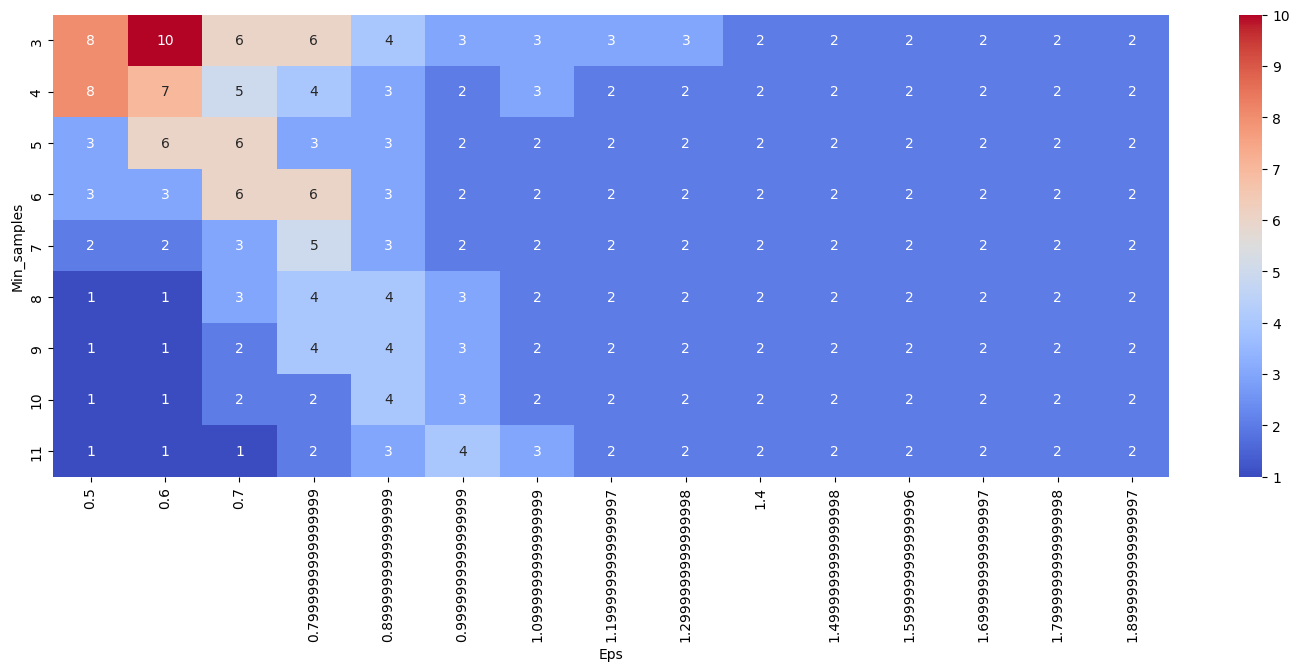

In [226]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_2, annot=True, annot_kws={"size":10}, cmap='coolwarm', ax=ax)

In [227]:
dbscan_train = DBSCAN(eps=1.2, min_samples=3)
y_dbscan = dbscan_train.fit_predict(pca_data_scaled)
print(silhouette_score(pca_data_scaled, y_dbscan))
df["dbscan_pca"] = y_dbscan

0.1859117573078433


Sin PCA

In [228]:
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(df_scaled)
distances, indices = neighbors_fit.kneighbors(df_scaled)

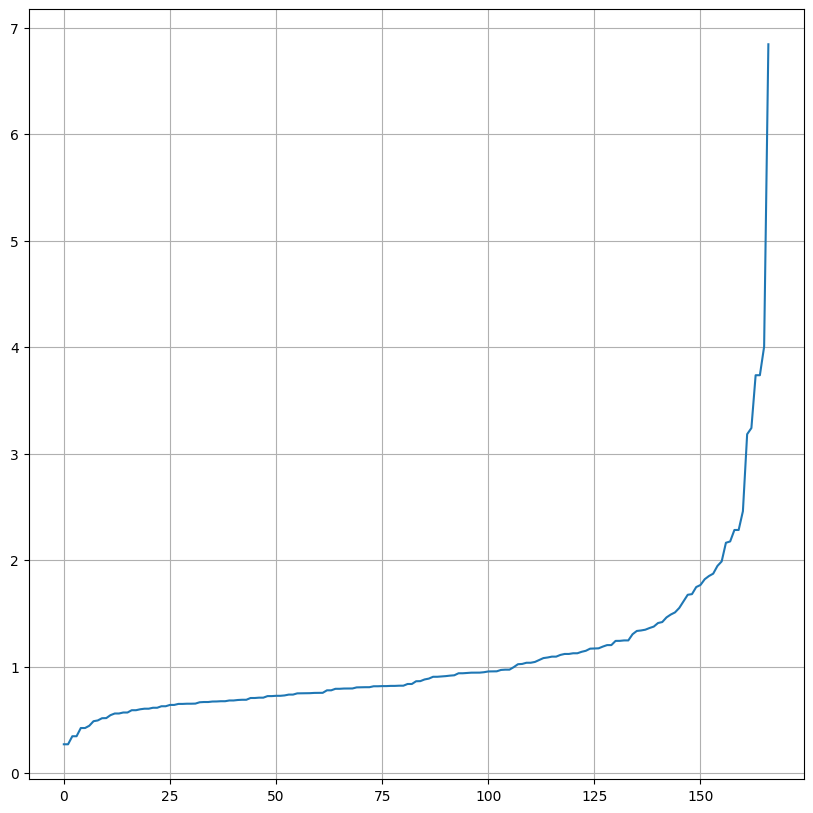

In [229]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
fig = plt.figure(figsize=(10, 10))
plt.plot(distances)
plt.grid()
plt.show()

In [230]:
eps_values = np.arange(1, 3.0, 0.1)
min_samples = np.arange(3, 12)
eps_values, min_samples

(array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
        2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9]),
 array([ 3,  4,  5,  6,  7,  8,  9, 10, 11]))

In [231]:
dbscan_prams = list(product(eps_values, min_samples))

no_of_clusters = []
sil_scores = []
for i in dbscan_prams:
    y_dbscan = DBSCAN(eps=i[0], min_samples=i[1]).fit_predict(df_scaled)
    try:
        sil_scores.append(silhouette_score(df_scaled, y_dbscan))
        
    except:
        sil_scores.append(0)
    no_of_clusters.append(len(np.unique(y_dbscan)))

In [232]:
df_param_tunning = pd.DataFrame.from_records(dbscan_prams, columns=['Eps', 'Min_samples'])
df_param_tunning['sil_scores'] = sil_scores
df_param_tunning['no_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(df_param_tunning, values='sil_scores', columns='Eps', index='Min_samples')
pivot_2 = pd.pivot_table(df_param_tunning, values='no_of_clusters', columns='Eps', index='Min_samples')

<Axes: xlabel='Eps', ylabel='Min_samples'>

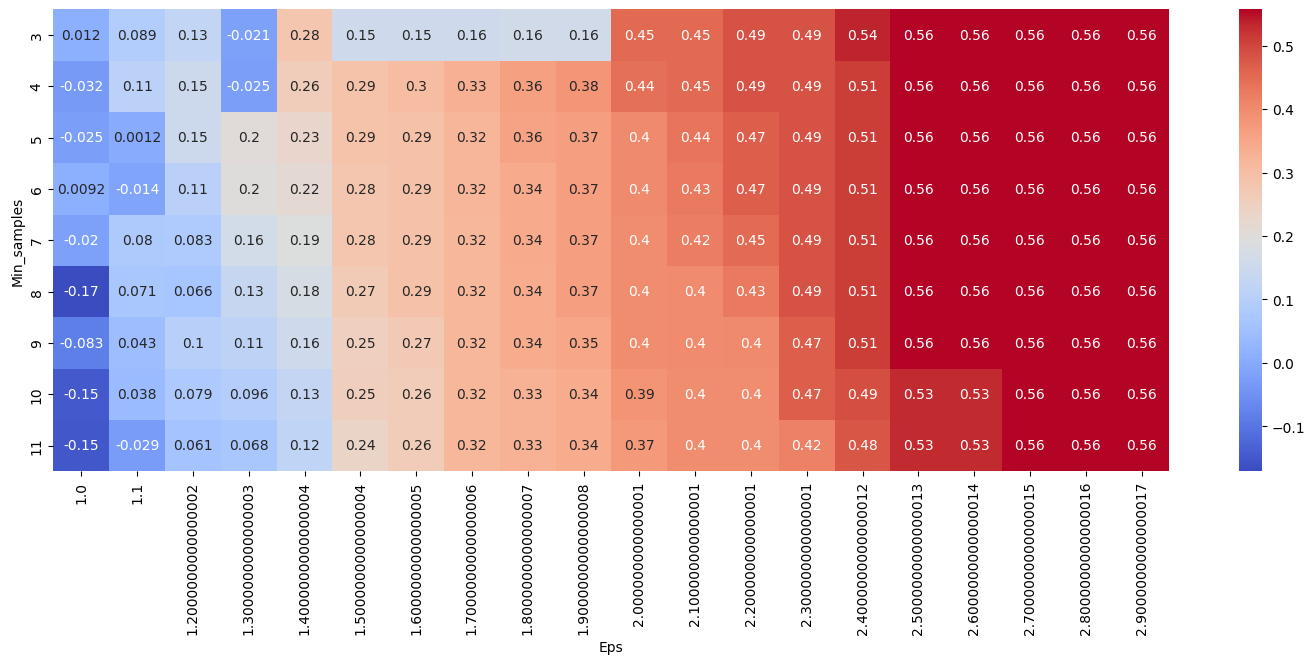

In [233]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size":10}, cmap='coolwarm', ax=ax)

<Axes: xlabel='Eps', ylabel='Min_samples'>

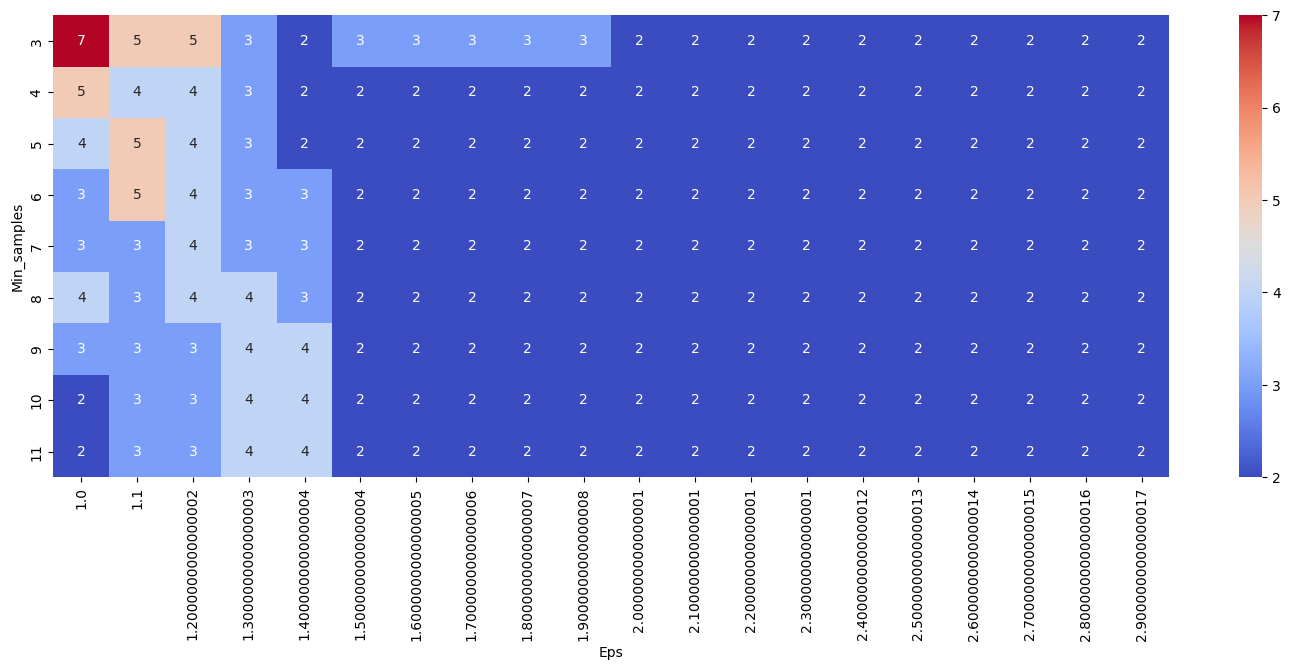

In [234]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_2, annot=True, annot_kws={"size":10}, cmap='coolwarm', ax=ax)

In [235]:
dbscan_train = DBSCAN(eps=1.9, min_samples=3)
y_dbscan = dbscan_train.fit_predict(df_scaled)
print(silhouette_score(df_scaled, y_dbscan))
df["dbscan_cluster"] = y_dbscan

0.16132955307173857


In [236]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_pca,hc_pca,hc,dbscan_pca,dbscan_cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2,1,0,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,0,0,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,1,0,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2,1,0,-1,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1,0,0,0,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1,1,0,-1,-1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1,0,0,0,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,2,1,0,0,0


## Evaluación de resultados

In [237]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'k_means_pca', 'hc_pca',
       'hc', 'dbscan_pca', 'dbscan_cluster'],
      dtype='object')

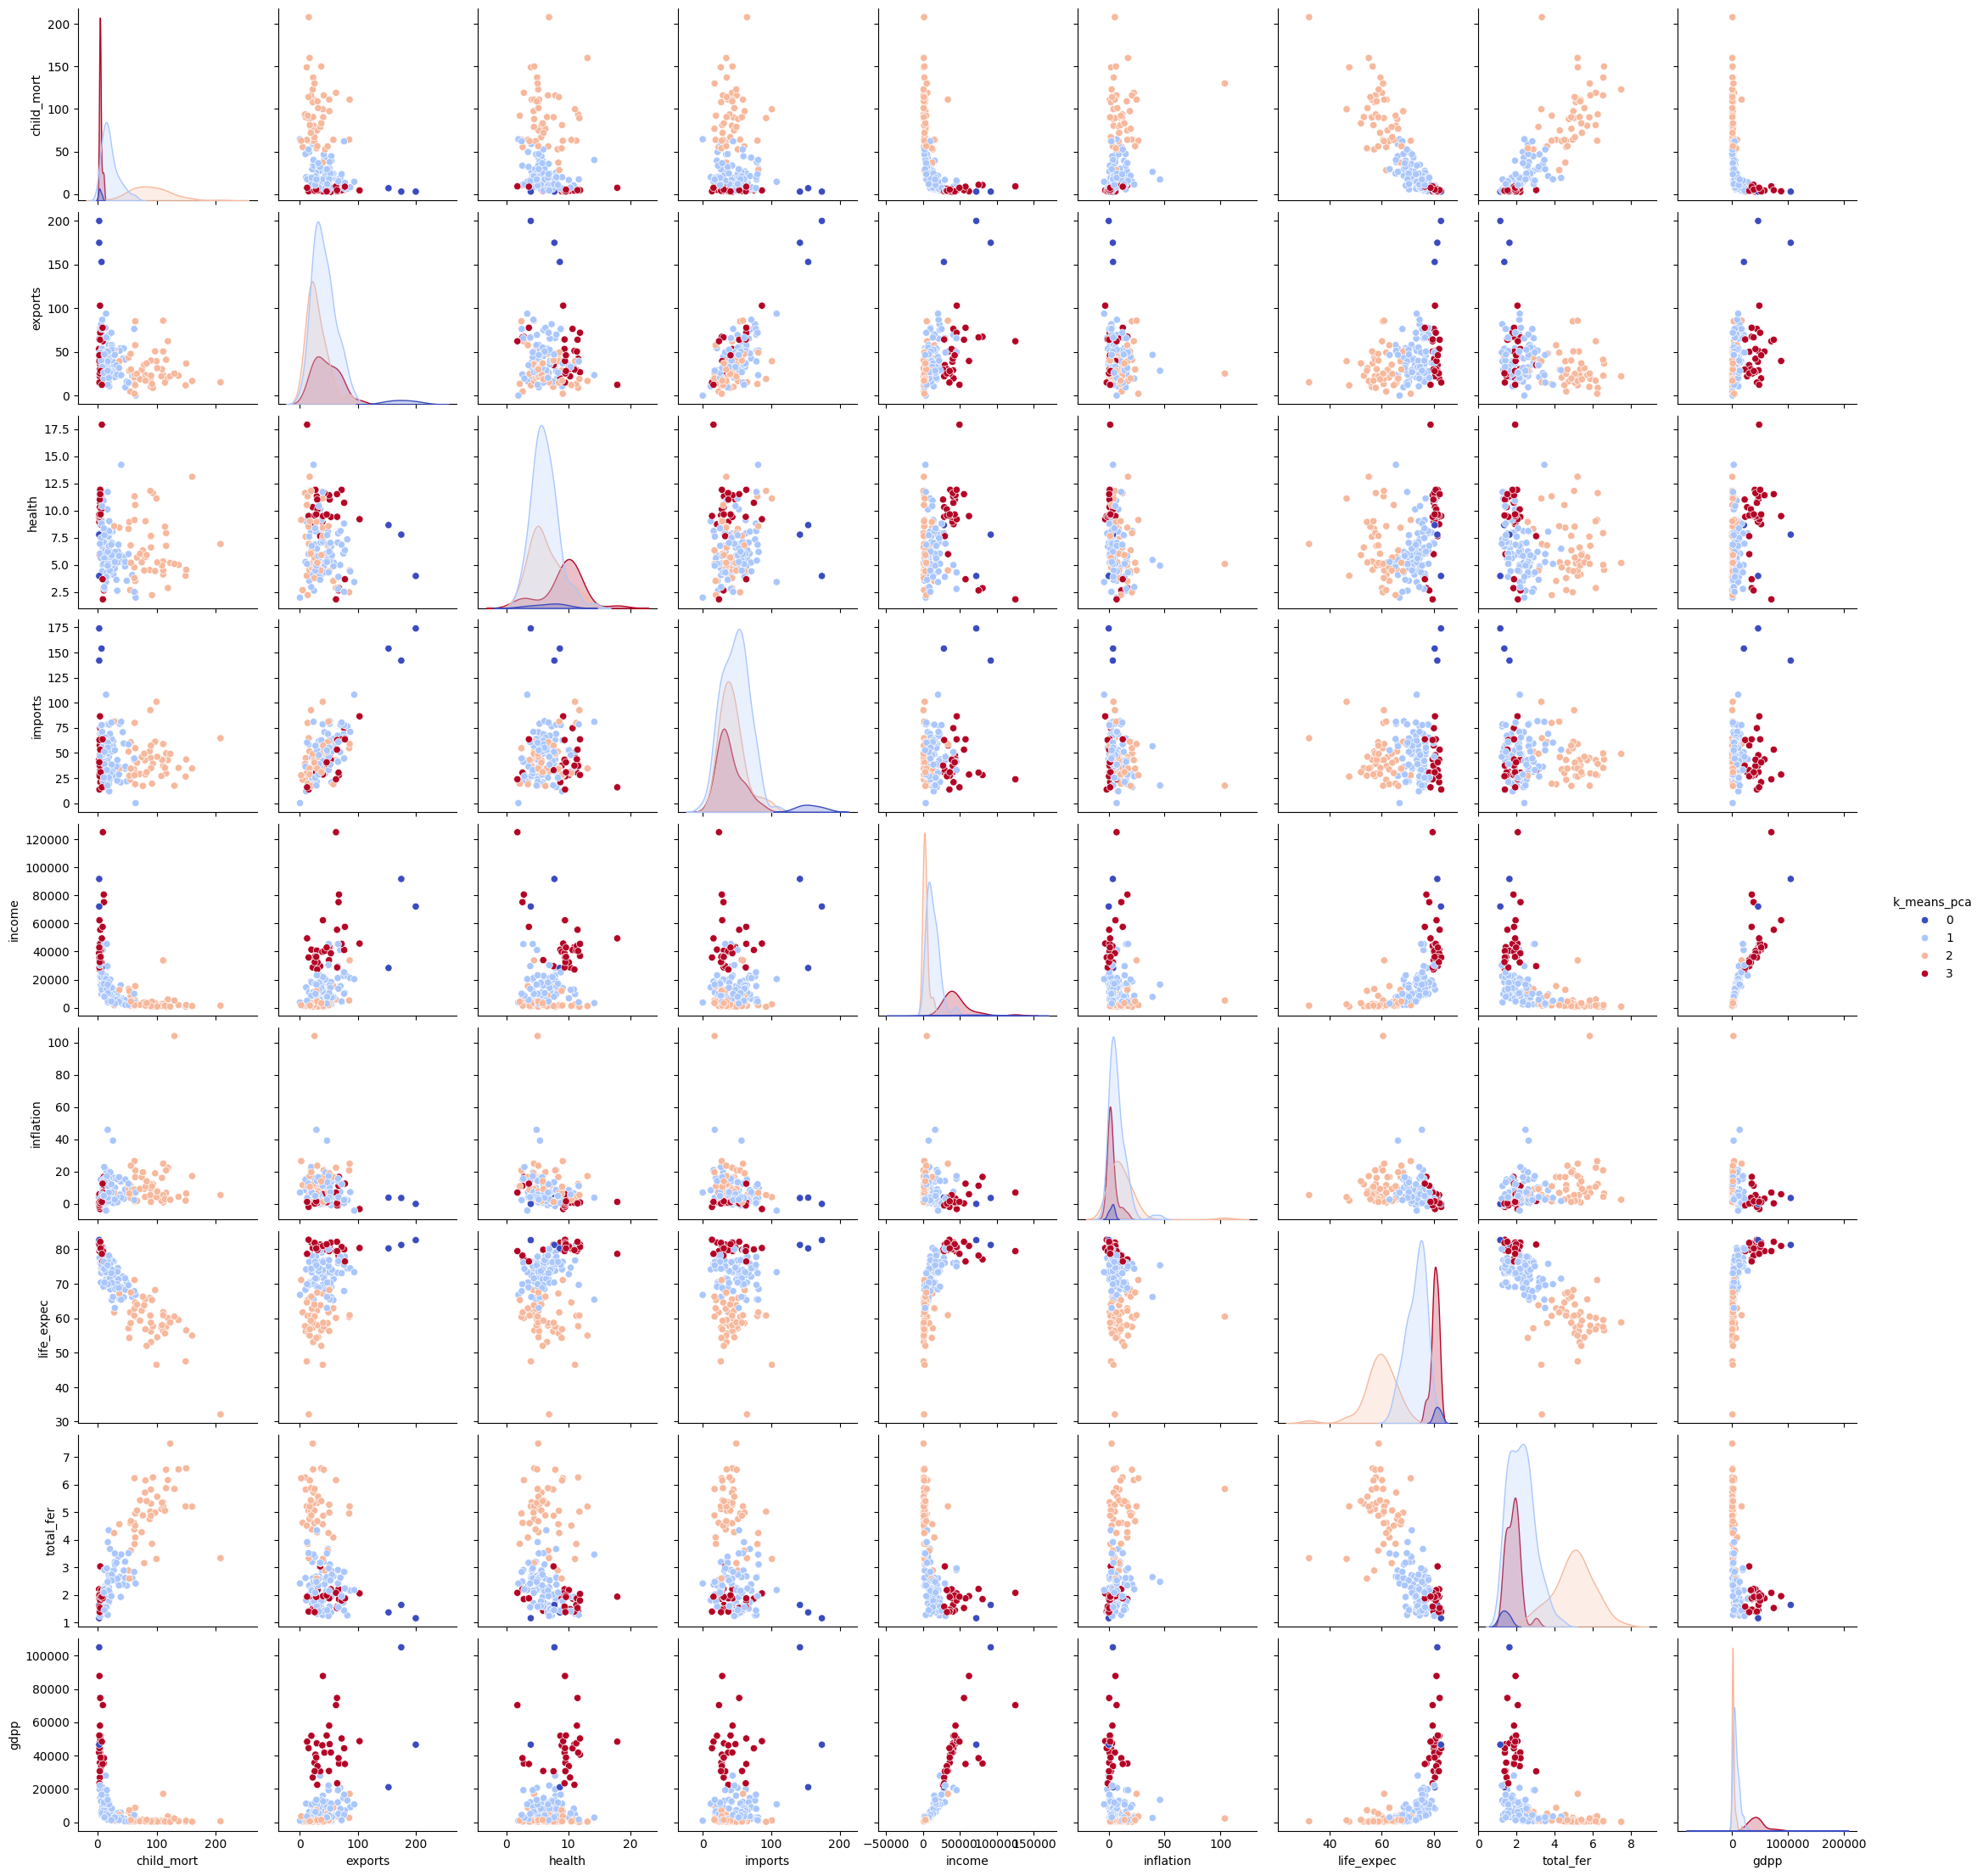

In [238]:
sns.pairplot(data = df[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'k_means_pca']], hue='k_means_pca', palette='coolwarm')

<Axes: xlabel='child_mort', ylabel='gdpp'>

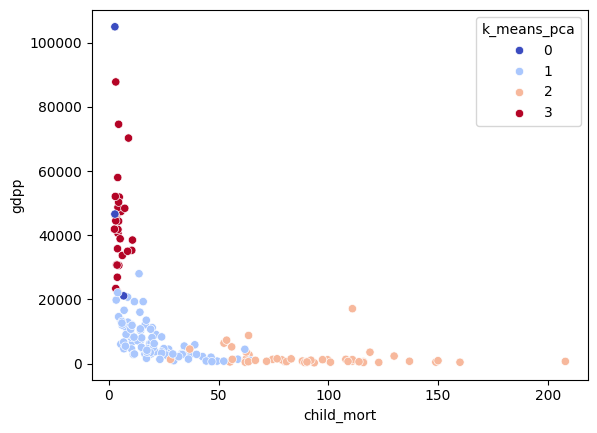

In [241]:
sns.scatterplot(data=df, x='child_mort', y='gdpp', hue='k_means_pca', palette='coolwarm')

In [242]:
df[df['k_means_pca'] == 3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_pca,hc_pca,hc,dbscan_pca,dbscan_cluster
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,3,0,1,0,0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,3,0,1,0,0
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,3,0,1,0,0
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,3,0,1,-1,0
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,3,0,1,0,0
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,3,0,0,0,0
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,3,0,1,0,0
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,3,0,1,0,0
54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600,3,0,1,0,0
58,Germany,4.2,42.3,11.60,37.1,40400,0.758,80.1,1.39,41800,3,0,1,0,0
